<a href="https://colab.research.google.com/github/victorkaillo/ML/blob/main/OpenCV_with_Python.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Estudaremos nessa aula:

- Conceitos básicos sobre de Processamento Digital de Imagens;

Vídeos sobre convolução: 

* How Blurs & Filters Work - https://youtu.be/C_zFhWdM4ic
* Finding the Edges (Sobel Operator) - https://youtu.be/uihBwtPIBxM
* Zero Padding in Convolutional Neural Networks - https://youtu.be/qSTv_m-KFk0
* Convolutions in image processing: https://youtu.be/8rrHTtUzyZA
* Canny Edge Detector: https://youtu.be/sRFM5IEqR2w


In [8]:
#importando bibliotecas
import cv2 as cv
from matplotlib import pyplot as plt
import numpy as np
from scipy import signal

##Convolução
- Conceitos sobre convolução: http://d2l.ai/chapter_convolutional-neural-networks/conv-layer.html

kernels :  

- https://en.wikipedia.org/wiki/Kernel_(image_processing)

- https://aishack.in/tutorials/image-convolution-examples/





Biblioteca scipy



In [9]:
#criando arrays
img_   = np.array([[0,1,2],[3,4,5],[6,7,8]])
kernel = np.array([[0,1],[2,3]])

print(img_)
print('\n',kernel) 

#usando o scipy para convolucao 2D
output1 = signal.correlate(img_,kernel, mode='valid')

print('\n',output1)

[[0 1 2]
 [3 4 5]
 [6 7 8]]

 [[0 1]
 [2 3]]

 [[19 25]
 [37 43]]


Convolução com o Opencv:





(189, 234)


(<matplotlib.axes._subplots.AxesSubplot at 0x7f7ad5ed3fd0>,
 <matplotlib.image.AxesImage at 0x7f7ad598c190>)

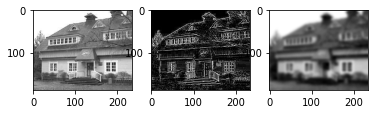

In [10]:
#abrindo imagem com opencv
img = cv.imread('casa.jpeg')
gray = cv.cvtColor(img, cv.COLOR_BGR2GRAY)
print(np.shape(gray))

#kernels
kb = (np.array([[1,1,1],[1,1,1],[1,1,1]]))/9 #blur
ke = (np.array([[-1,-1,-1],[-1,8,-1],[-1,-1,-1]])) #edge

#convolucao 2D com opencv
edge = cv.filter2D(gray,kernel=ke,ddepth=-1)
gray_b = cv.filter2D(gray,kernel=kb,ddepth=-1)
for i in range(10):
  gray_b = cv.filter2D(gray_b,kernel=kb,ddepth=-1)

plt.subplot(1, 3, 1), plt.imshow(gray,cmap='gray')
plt.subplot(1, 3, 2), plt.imshow(edge,cmap='gray')
plt.subplot(1, 3, 3), plt.imshow(gray_b,cmap='gray')

Crie seu próprio code para convolução

# Exercícios
1 - Utilizando a sequência de kernels que foram apresentados, escreva um programa em python (utilize bibliotecas como numpy e opencv) que mostre os resultados de cada um dos filtros no processo de convolução de imagens. Escreva um comentário explicando o que ocorreu, se houveram efeitos e suas impressões.

(200, 200)


(<matplotlib.axes._subplots.AxesSubplot at 0x7f7ad3694350>,
 Text(0.5, 1.0, 'Lapalaciano'))

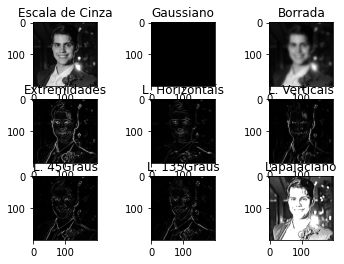

In [26]:
#abrindo imagem com opencv
img = cv.imread('foo.png')
gray = cv.cvtColor(img, cv.COLOR_BGR2GRAY)
print(np.shape(gray))

#kernels
kb = (np.array([[1,1,1],[1,1,1],[1,1,1]]))/9 #blur
kgb = (np.array([[0,0,0,5,0,0,0],[0,5,18,32,18,5,0],[0,18,64,100,64,18,0],[5,32,100,100,100,32,5],[0,18,64,100,64,18,0],[0,5,18,32,18,5,0],[0,0,0,5,0,0,0]])) #Gaussian Blur
khl = (np.array([[-1,-1,-1],[2,2,2],[-1,-1,-1]])) #Horizontal Lines
kvl = (np.array([[-1,2,-1],[-1,2,-1],[-1,2,-1]])) #Vertical Lines
k45d = (np.array([[-1,-1,2],[-1,2,-1],[2,-1,-1]])) #45 degree Lines
k135d = (np.array([[2,-1,-1],[-1,2,-1],[-1,-1,2]])) #135 degree Lines
ke = (np.array([[-1,-1,-1],[-1,8,-1],[-1,-1,-1]])) #edge
kl = (np.array([[0,0,1,0,0],[0,-1,-2,-1,0],[-1,-2,16,-2,-1],[0,-1,-2,-1,0],[0,0,1,0,0]])) #laplaciano

#convolucao 2D com opencv
gaussian_b = cv.filter2D(gray,kernel=kgb,ddepth=-1)
horizontal_l = cv.filter2D(gray,kernel=khl,ddepth=-1)
vertical_l = cv.filter2D(gray,kernel=kvl,ddepth=-1)
degree45_l = cv.filter2D(gray,kernel=k45d,ddepth=-1)
degree135_l = cv.filter2D(gray,kernel=k135d,ddepth=-1)
edge = cv.filter2D(gray,kernel=ke,ddepth=-1)
laplaciano = cv.filter2D(gray,kernel=kl,ddepth=-1)


gray_b = cv.filter2D(gray,kernel=kb,ddepth=-1)
for i in range(10):
  gray_b = cv.filter2D(gray_b,kernel=kb,ddepth=-1)

plt.subplot(3, 3, 1), plt.imshow(gray,cmap='gray'),plt.title('Escala de Cinza')
plt.subplot(3, 3, 2), plt.imshow(gaussian_b,cmap='gray'),plt.title('Gaussiano')
plt.subplot(3, 3, 3), plt.imshow(gray_b,cmap='gray'),plt.title('Borrada')
plt.subplot(3, 3, 4), plt.imshow(edge,cmap='gray'),plt.title('Extremidades')
plt.subplot(3, 3, 5), plt.imshow(horizontal_l,cmap='gray'),plt.title('L. Horizontais')
plt.subplot(3, 3, 6), plt.imshow(vertical_l,cmap='gray'),plt.title('L. Verticais')
plt.subplot(3, 3, 7), plt.imshow(degree45_l,cmap='gray'),plt.title('L. 45Graus')
plt.subplot(3, 3, 8), plt.imshow(degree135_l,cmap='gray'),plt.title('L. 135Graus')
plt.subplot(3, 3, 9), plt.imshow(laplaciano,cmap='gray'),plt.title('Lapalaciano')


É notável o funcionamento dos filtros que enaltecem as bordas, linhas horizontais, linhas verticais e as diagonais. O filtro gaussiano precisariam de compressão para termos um resultado mais claro. O filtro de bordas também percebe-se bem que enaltece as bordas. 

2 - Pesquise por pelo menos três novos kernels, realize novas convoluções e mostre os resultados obtidos.

(200, 200)


(<matplotlib.axes._subplots.AxesSubplot at 0x7f7ad53d1f50>,
 Text(0.5, 1.0, 'Relevos'))

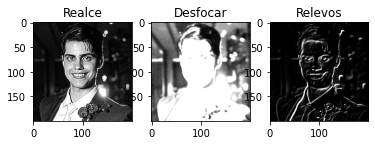

In [20]:
img = cv.imread('kaillo.png')
gray = cv.cvtColor(img, cv.COLOR_BGR2GRAY)
print(np.shape(gray))

kb = (np.array([[0,-1,0],[-1,5.2,-1],[0,-1,0]]))
boost = cv.filter2D(gray,kernel=kb,ddepth=-1)

kdes = (np.array([[1,1,1],[1,1,1],[1,1,1]]))
desfocar = cv.filter2D(gray,kernel=kdes,ddepth=-1)

kr = (np.array([[-2,-1,0],[-1,1,0],[0,1,2]]))
relevo = cv.filter2D(gray,kernel=kr,ddepth=-1) 

plt.subplot(1, 3, 1), plt.imshow(boost, cmap='gray'),plt.title('Realce')
plt.subplot(1, 3, 2), plt.imshow(desfocar,cmap='gray'),plt.title('Desfocar')
plt.subplot(1, 3, 3), plt.imshow(relevo,cmap='gray'),plt.title('Relevos')

3 - Insira algum tipo de ruído nas imagens (pesquise algumas opções, por exemplo: salt and pepper noise) e em diferentes níveis. Depois disto, procure algum kernel apropriado para filtragem e remoção deste ruído. Apresente os resultados, explicando o tipo de ruído inserido e os efeitos do kernel selecionado para remoção.

(<matplotlib.axes._subplots.AxesSubplot at 0x7f7ad33c3b10>,
 Text(0.5, 1.0, 'Ruído 2'))

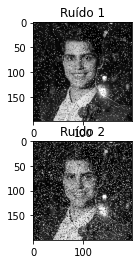

In [32]:
import random

def sp_noise(image,prob):
    '''
    Add salt and pepper noise to image
    prob: Probability of the noise
    '''
    output = np.zeros(image.shape,np.uint8)
    thres = 1 - prob 
    for i in range(image.shape[0]):
        for j in range(image.shape[1]):
            rdn = random.random()
            if rdn < prob:
                output[i][j] = 0
            elif rdn > thres:
                output[i][j] = 255
            else:
                output[i][j] = image[i][j]
    return output

image = cv.imread('foo.png',0) # Only for grayscale image
#gray = cv.cvtColor(img, cv.COLOR_BGR2GRAY)
ruidos_1 = sp_noise(image,0.05)
plt.subplot(2, 1, 1), plt.imshow(ruidos_1, cmap='gray'),plt.title('Ruído 1')

ruidos_2 = sp_noise(image,0.1)
plt.subplot(2, 1, 2), plt.imshow(ruidos_2, cmap='gray'),plt.title('Ruído 2')
#cv2.imwrite('sp_noise.jpg', noise_img)

Retirando o ruído:

(<matplotlib.axes._subplots.AxesSubplot at 0x7f7ad338c150>,
 <matplotlib.image.AxesImage at 0x7f7ad32fc0d0>)

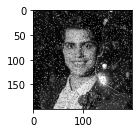

In [33]:
plt.subplot(2, 1, 2), plt.imshow(ruidos_1, cmap='gray')


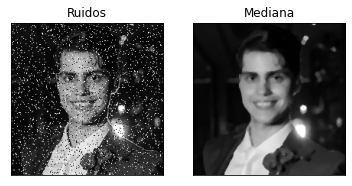

In [34]:
median = cv.medianBlur(ruidos_1,5)
plt.subplot(121),plt.imshow(ruidos_1, cmap='gray'),plt.title('Ruidos')
plt.xticks([]), plt.yticks([])
plt.subplot(122),plt.imshow(median, cmap='gray'),plt.title('Mediana')
plt.xticks([]), plt.yticks([])
plt.show()


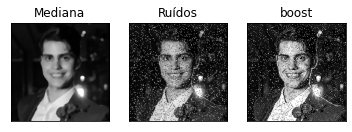

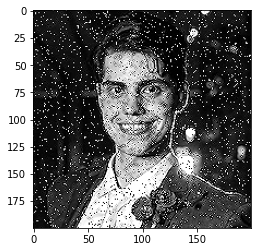

In [35]:
kb = (np.array([[0,-1,0],[-1,5.2,-1],[0,-1,0]]))
boost = cv.filter2D(ruidos_1,kernel=kb,ddepth=-1)

#ruidos_1 = cv.filter2D(boost,kernel=kl,ddepth=-1)
#diferenca = median - edge
#diff = median + diferenca #horizontal_l + vertical_l + degree45_l + degree135_l   # elementwise for scipy arrays
#m_norm = sum(abs(diff))  # Manhattan norm
#z_norm = norm(diff.ravel(), 0)  # Zero norm

plt.subplot(131),plt.imshow(median, cmap='gray'),plt.title('Mediana')
plt.xticks([]), plt.yticks([])
plt.subplot(132),plt.imshow(ruidos_1, cmap='gray'),plt.title('Ruídos')
plt.xticks([]), plt.yticks([])
plt.subplot(133),plt.imshow(boost,cmap='gray'),plt.title('boost')
plt.xticks([]), plt.yticks([])
plt.show()
plt.imshow(boost, cmap = plt.cm.gray) 

(<matplotlib.image.AxesImage at 0x7f7ace826e90>,
 Text(0.5, 1.0, 'Boost na mediana'))

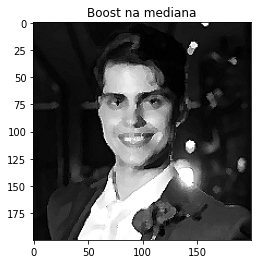

In [48]:
boost_m = cv.filter2D(median,kernel=kb,ddepth=-1)
#laplaciano_m = cv.filter2D(median,kernel=ke,ddepth=-1)

plt.imshow(boost_m,cmap='gray'),plt.title('Boost na mediana')
